<a href="https://colab.research.google.com/github/Ehtisham1053/Regression-ML-Algorithms/blob/main/Random_forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class ManualRandomForestRegressor:
    def __init__(self, n_estimators=50, max_depth=None, max_features='sqrt', random_state=42):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.subsets = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            # Bootstrap Sampling (Random Sampling with Replacement)
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_subset, y_subset = X[indices], y[indices]

            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_subset, y_subset)

            self.trees.append(tree)
            self.subsets.append(indices)

    def predict(self, X):
        # Aggregate Predictions from all Trees (Bagging)
        predictions = np.zeros((self.n_estimators, X.shape[0]))

        for i, tree in enumerate(self.trees):
            predictions[i] = tree.predict(X)

        return np.mean(predictions, axis=0)

    def evaluate(self, X_train, y_train, X_test, y_test):
        y_train_pred = self.predict(X_train)
        y_test_pred = self.predict(X_test)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        print("Train MSE:", train_mse)
        print("Test MSE:", test_mse)
        print("Train MAE:", train_mae)
        print("Test MAE:", test_mae)
        print("Train R² Score:", train_r2)
        print("Test R² Score:", test_r2)

        return train_mse, test_mse, train_mae, test_mae, train_r2, test_r2

    def plot_decision_boundary(self, X, y):
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 100),
                             np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 100))
        Z = self.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8,6))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
        plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k')
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.title("Decision Boundary of Random Forest Regressor")
        plt.colorbar()
        plt.show()



In [2]:
data = sns.load_dataset("penguins").dropna()
X = data.drop(columns=['species']).select_dtypes(include=[np.number]).values
y = data['bill_length_mm'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train MSE: 0.018594015497171833
Test MSE: 0.05217586090459472
Train MAE: 0.07551922978432747
Test MAE: 0.10947578412630161
Train R² Score: 0.9993611028305384
Test R² Score: 0.9983900534459658


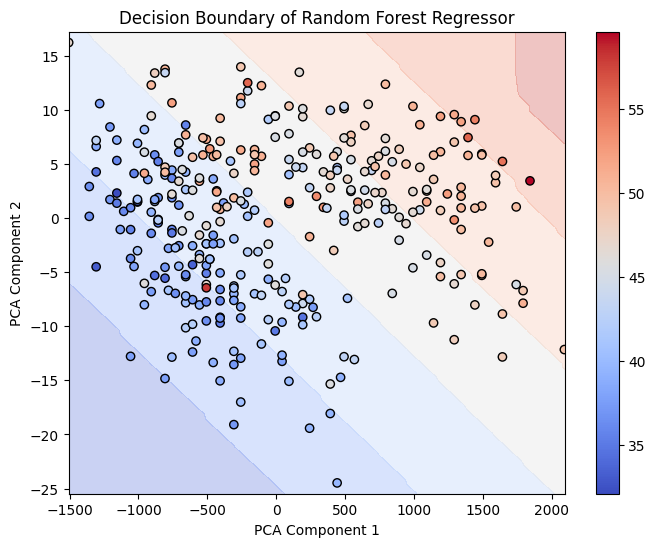

In [3]:
rf_regressor = ManualRandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_regressor.evaluate(X_train, y_train, X_test, y_test)
rf_regressor.plot_decision_boundary(X, y)